#Load Data

In [562]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit


In [563]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [565]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [566]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [567]:
df.isnull().sum() / df.shape[0] * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [568]:
df[['agent', 'company']] = df[['agent', 'company']].fillna(0)
df['children'] = df['children'].fillna(df.children.mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [569]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [570]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [571]:
df['arrival_date_year'] = df['arrival_date_year'].astype(int)

In [572]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

In [573]:
df['season'] = df['arrival_date_month'].apply(month_to_season)

In [574]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [575]:
monthly_booking = df.groupby(['arrival_date_year','arrival_date_month', 'hotel']).size().reset_index(name='num_bookings')

In [576]:
df['month_num'] = df['arrival_date_month'].apply(lambda x: month_order.index(x) + 1)
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)
cat_features = ['hotel', 'meal', 'deposit_type', 'season']

In [577]:
df = pd.get_dummies(df, columns=cat_features)

In [578]:
monthly_booking['month_num'] = monthly_booking['arrival_date_month'].map(lambda x: month_order.index(x) + 1)

In [579]:
le = LabelEncoder()
train_mask = monthly_booking['arrival_date_year'] < 2018
le.fit(monthly_booking[train_mask]['hotel'])
monthly_booking['hotel_encoded'] = le.transform(monthly_booking['hotel'])

In [580]:
monthly_booking['previous_year_bookings'] = monthly_booking.groupby(['month_num', 'hotel_encoded'])['num_bookings'].shift(1)

In [581]:
monthly_booking = monthly_booking.dropna()

In [582]:
monthly_booking['is_summer'] = monthly_booking['arrival_date_month'].isin(['June', 'July', 'August']).astype(int)

In [583]:
monthly_booking['is_holiday'] = monthly_booking['arrival_date_month'].isin(['December', 'January']).astype(int)

In [584]:
monthly_booking['yoy_growth'] = monthly_booking.groupby(['hotel', 'month_num'])['num_bookings'].pct_change(periods=12)

##Train-test split (train on 2015-2016, test on 2017)
time-based split

In [585]:
x = monthly_booking[['arrival_date_year','month_num', 'hotel_encoded', 'previous_year_bookings']]
y = monthly_booking['num_bookings']

In [586]:
x_train = x[(x['arrival_date_year'] >= 2015) & (x['arrival_date_year'] <= 2016)]
y_train = y[(x['arrival_date_year'] >= 2015) & (x['arrival_date_year'] <= 2016)]
x_test = x[x['arrival_date_year'] == 2017]
y_test = y[x['arrival_date_year'] == 2017]

In [587]:
tscv = TimeSeriesSplit(n_splits=3)

In [588]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5 , 10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.8]
}

In [589]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
model = grid_search.best_estimator_


Best parameters found:  {'max_depth': 5, 'max_features': 0.8, 'min_samples_split': 2, 'n_estimators': 200}


In [590]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [591]:
pred_test = model.predict(x_test)
print(f"MAE on 2017 test data: {mean_absolute_error(y_test, pred_test)}")
print(f"R^2 on 2017 test data: {r2_score(y_test, pred_test)}")
print(np.sqrt(mean_squared_error(y_test, pred_test)))

MAE on 2017 test data: 295.95500000000004
R^2 on 2017 test data: 0.8522327546219335
393.22857888256294


In [592]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
print(comparison.head())

    Actual  Predicted
36    3919    3859.56
37    1742    1669.79
38    3125    3949.03
39    1800    1675.49
40    2594    3148.64


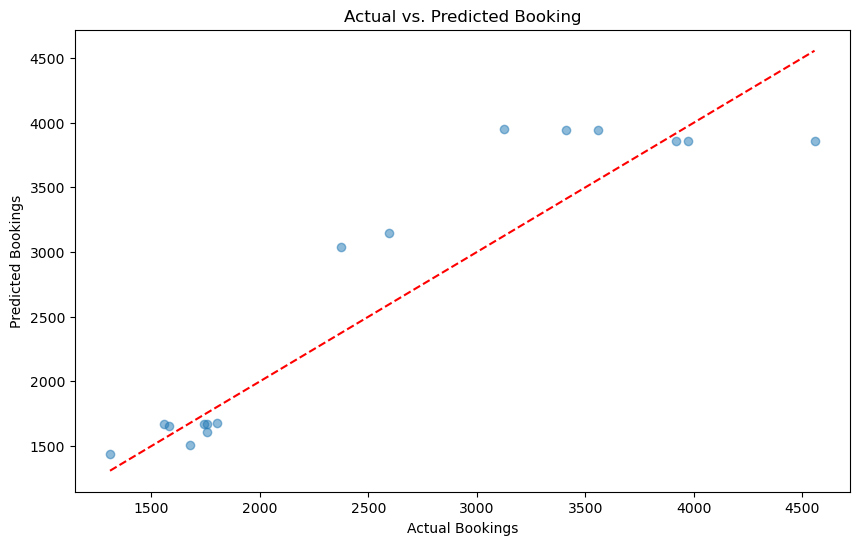

In [593]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Bookings")
plt.ylabel("Predicted Bookings")
plt.title("Actual vs. Predicted Booking")
plt.show()

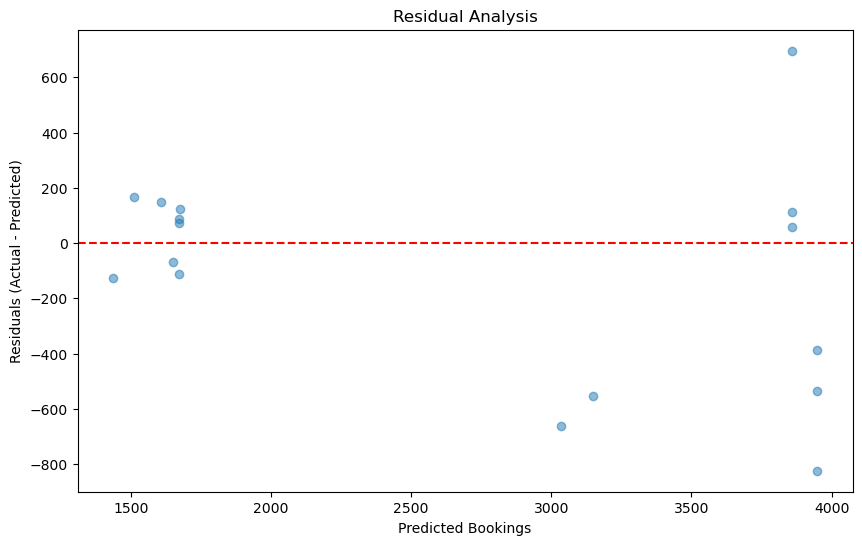

In [594]:
residuals = y_test - pred_test
plt.figure(figsize=(10, 6))
plt.scatter(pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Bookings")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Analysis")
plt.show()

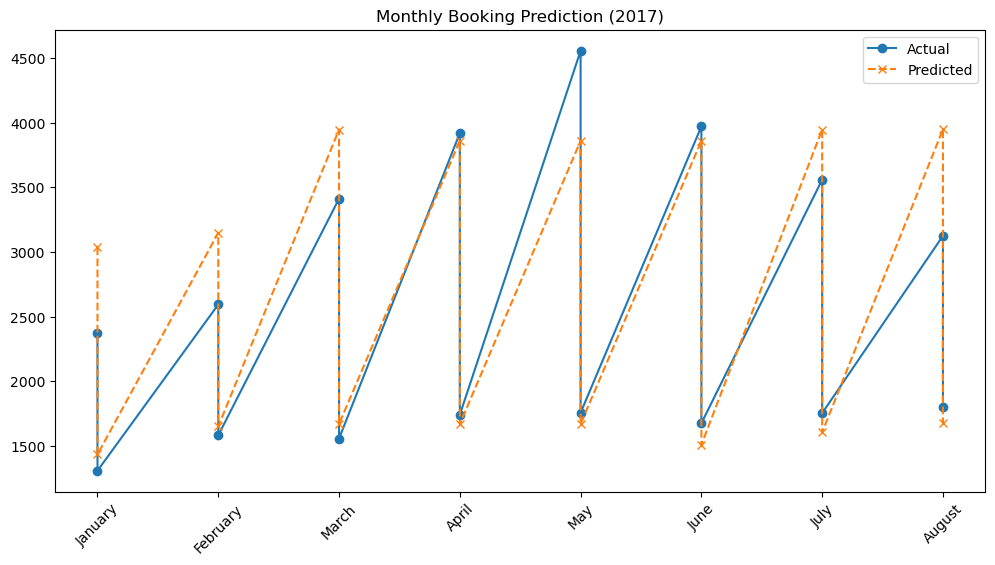

In [595]:
df_2017 = monthly_booking[monthly_booking['arrival_date_year'] == 2017].copy()

# Add predictions and actuals to the DataFrame
df_2017['y_actual'] = y_test
df_2017['y_pred'] = pred_test

# Sort by numerical month
df_2017 = df_2017.sort_values('month_num')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_2017['arrival_date_month'], df_2017['y_actual'], 'o-', label="Actual")
plt.plot(df_2017['arrival_date_month'], df_2017['y_pred'], 'x--', label="Predicted")
plt.xticks(rotation=45)
plt.legend()
plt.title("Monthly Booking Prediction (2017)")
plt.show()